In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler # im not sure if this is needed

In [3]:
url = "https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv"
bank = pd.read_csv(url, header=0)


In [4]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [5]:
bank.shape

(41188, 21)

In [6]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [7]:
bank = bank[
    [
        "age",
        "campaign",
        "pdays",
        "previous",
        "emp_var_rate",
        "cons_price_idx",
        "cons_conf_idx",
        "euribor3m",
        "nr_employed",
        "y",
    ]
]


In [8]:
bank.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1


In [9]:
X = bank.drop(["y"], axis=1).values

In [10]:
y = bank["y"].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [13]:
# we need to scale the data
scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
logreg = LogisticRegression()
logreg.fit(X_scaled, y_train)

LogisticRegression()

In [14]:
print(confusion_matrix(y_test, logreg.predict(scaler.transform(X_test))))

[[10852   102]
 [ 1141   262]]


In [15]:
print(classification_report(y_test, logreg.predict(scaler.transform(X_test))))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     10954
           1       0.72      0.19      0.30      1403

    accuracy                           0.90     12357
   macro avg       0.81      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



In [17]:
y_hat_prob = logreg.predict_proba(scaler.transform(X_test))[:, 1]

Text(0, 0.5, 'True Positive Rate')

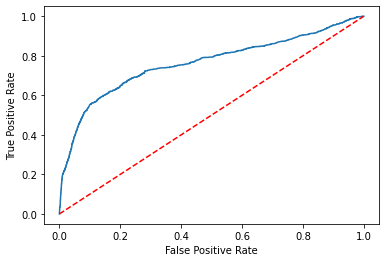

In [19]:
import matplotlib.pyplot as plt
false_positive, true_positive, thresholds = roc_curve(y_test, y_hat_prob)
plt.plot(false_positive, true_positive)
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


In [20]:
roc_auc_score(y_test, y_hat_prob)

0.7621460104465886

In [22]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(logreg, X_train, y_train, cv=6, scoring="roc_auc")


/usr/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz